In [1]:
from tkinter import *

master = Tk()
Label(master, text="First Name").grid(row=0)
Label(master, text="Last Name").grid(row=1)

e1 = Entry(master)
e2 = Entry(master)

e1.grid(row=0, column=1)
e2.grid(row=1, column=1)

mainloop()

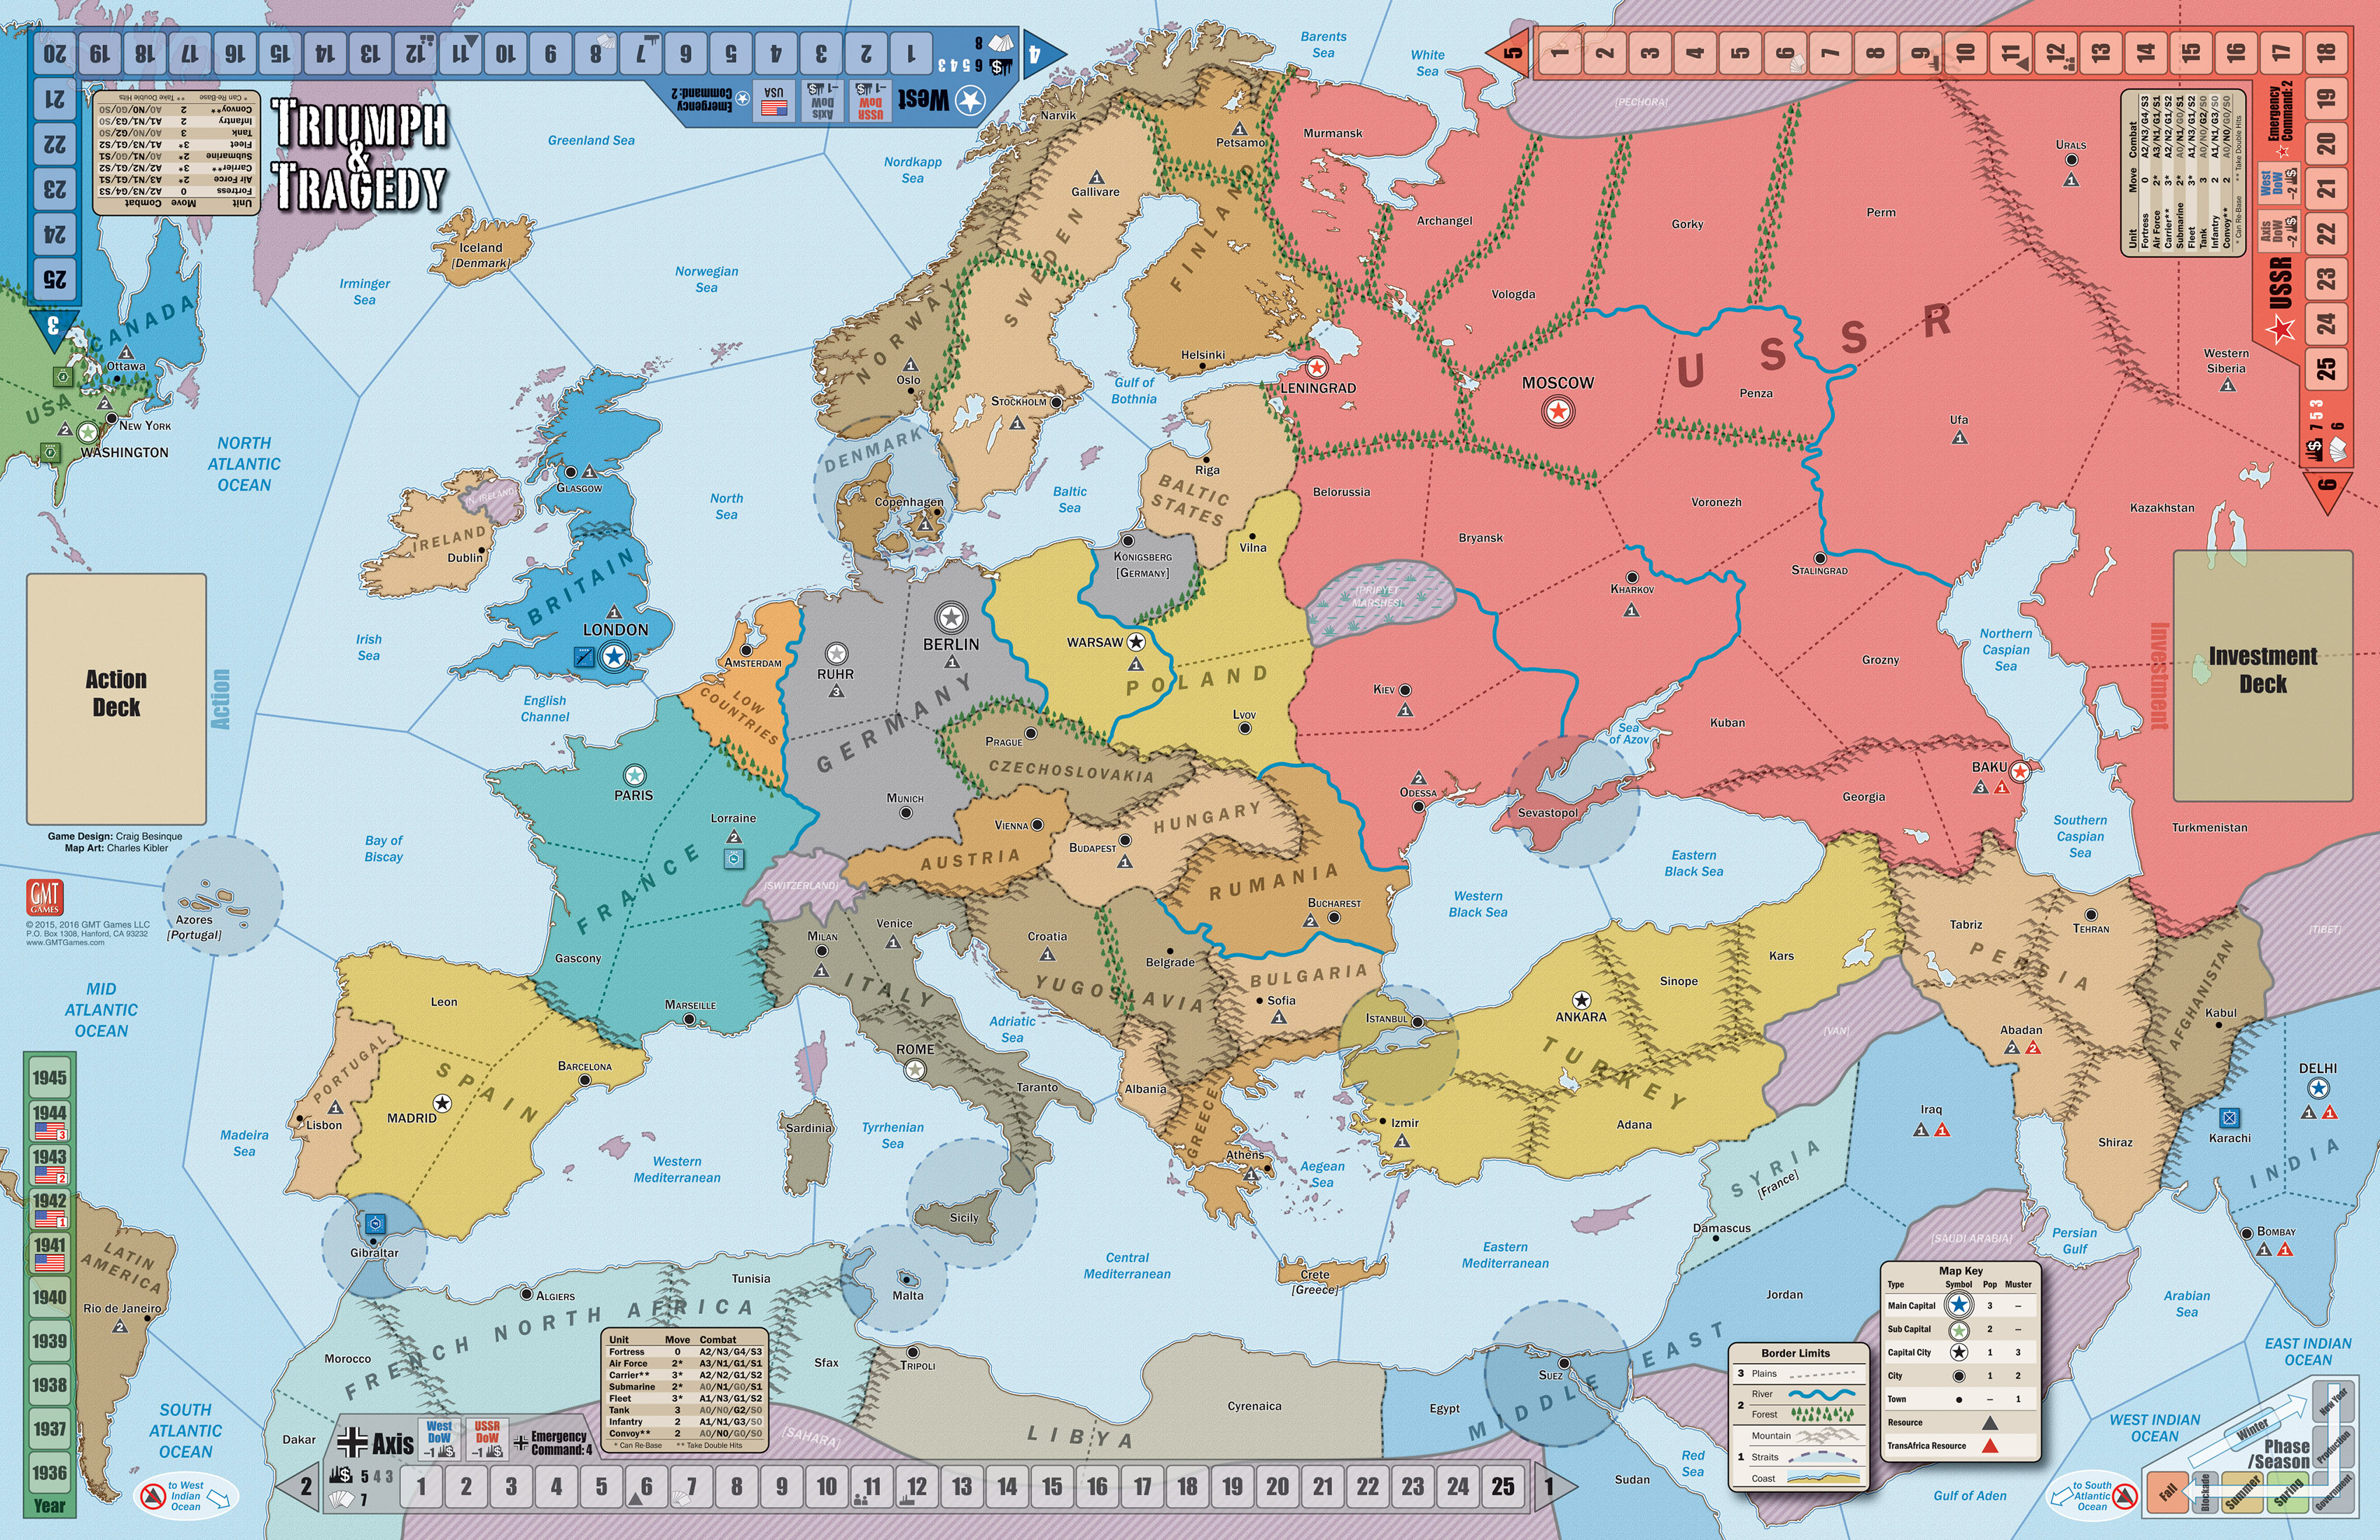

In [2]:
from IPython.display import Image
Image(filename='info/T&T_map+2Ed-100.jpg')

In [18]:
a = {
    "string": "string",
    "array": 'dsf', #[1, 2, 3],
    "bool": 2,
    "object": {
        "foo": "bar"
    }
}

In [21]:
a['sfd'] = 324

In [19]:
from tnt_util import renderJSON

In [22]:
renderJSON(a)

In [6]:


class RenderJSON(object):
    def __init__(self, json_data):
        if isinstance(json_data, dict):
            self.json_str = json_data
            #self.json_str = json.dumps(json_data)
        else:
            self.json_str = json
        self.uuid = str(uuid.uuid4())

    def _ipython_display_(self):
        display_html('<div id="{}" style="height: 600px; width:100%;"></div>'.format(self.uuid),
            raw=True
        )
        display_javascript("""
        require(["https://rawgit.com/caldwell/renderjson/master/renderjson.js"], function() {
          renderjson.set_show_to_level(1)
          document.getElementById('%s').appendChild(renderjson(%s))
        });
        """ % (self.uuid, self.json_str), raw=True)

In [7]:
RenderJSON({'test':'askd'})

In [3]:
from tkinter import *
fields = 'Last Name', 'First Name', 'Job', 'Country'

def fetch(entries):
    for entry in entries:
        field = entry[0]
        text  = entry[1].get()
        print('%s: "%s"' % (field, text)) 

def makeform(root, fields):
    entries = []
    for field in fields:
        row = Frame(root)
        lab = Label(row, width=15, text=field, anchor='w')
        ent = Entry(row)
        row.pack(side=TOP, fill=X, padx=5, pady=5)
        lab.pack(side=LEFT)
        ent.pack(side=RIGHT, expand=YES, fill=X)
        entries.append((field, ent))
    return entries

root = Tk()
ents = makeform(root, fields)
root.bind('<Return>', (lambda event, e=ents: fetch(e)))   
b1 = Button(root, text='Show',
      command=(lambda e=ents: fetch(e)))
b1.pack(side=LEFT, padx=5, pady=5)
b2 = Button(root, text='Quit', command=root.quit)
b2.pack(side=LEFT, padx=5, pady=5)
root.mainloop()